In [284]:
# Install required libraries
!pip install scikit-learn
!pip install ucimlrepo

# Import necessary libraries
import numpy as np 
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# Fetch dataset 
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas DataFrames)
X = heart_disease.data.features 
y = heart_disease.data.targets

# Metadata and variable information
print(heart_disease.metadata)
print(heart_disease.variables)




{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [285]:
# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the first few rows of the DataFrame
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [286]:

# Check for missing values
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [287]:
# Remove rows with any NaN values
for column in df.columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)


In [288]:
# Check for missing values again to ensure they are removed
print(df.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [289]:
# Separate features and target
X = df.drop(columns=['num'])  # Replace 'target_column' with your actual target column name
y = df['num']

In [290]:
# Initialize the StandardScaler and scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [291]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [292]:
# Create and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



LogisticRegression()

In [293]:
# Predict on the testing data
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)







In [294]:
# Evaluate the model

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Confusion matrix

Accuracy: 0.57
Precision: 0.54
Recall: 0.57


<Figure size 800x600 with 0 Axes>

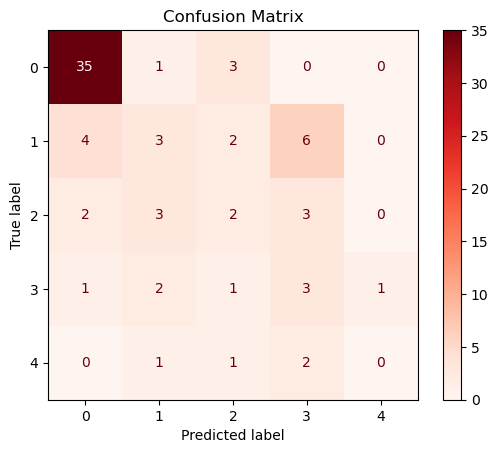

In [295]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained the model and made predictions

# Determine unique labels
unique_labels = np.unique([y_test, y_pred])

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object with the correct number of labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()


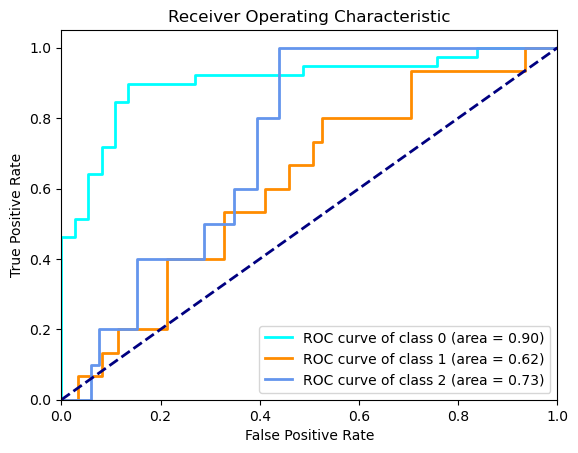

In [296]:
# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(len(np.unique(y))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()